In [739]:
import pandas as pd
import main_functions as functions
import importlib
import matplotlib.pyplot as plt

In [740]:
importlib.reload(functions)
fr_data = pd.read_csv('Data/Fertility rates.csv', skiprows=4)
dr_data = pd.read_csv('Data/Death rates.csv', skiprows=4)
covid_data = pd.read_csv('Data/WHO-COVID-19-global-data.csv')
polio_data = pd.read_csv('Data/the-number-of-reported-paralytic-polio-cases.csv')
hiv_data = pd.read_csv('Data/share-of-population-infected-with-hiv-ihme.csv')
iraq_death = pd.read_csv('Data/iraq-war-2003-2023.csv')
bt_death = pd.read_csv('Data/Battle-related-death.csv', skiprows=4)

Hypothesis one

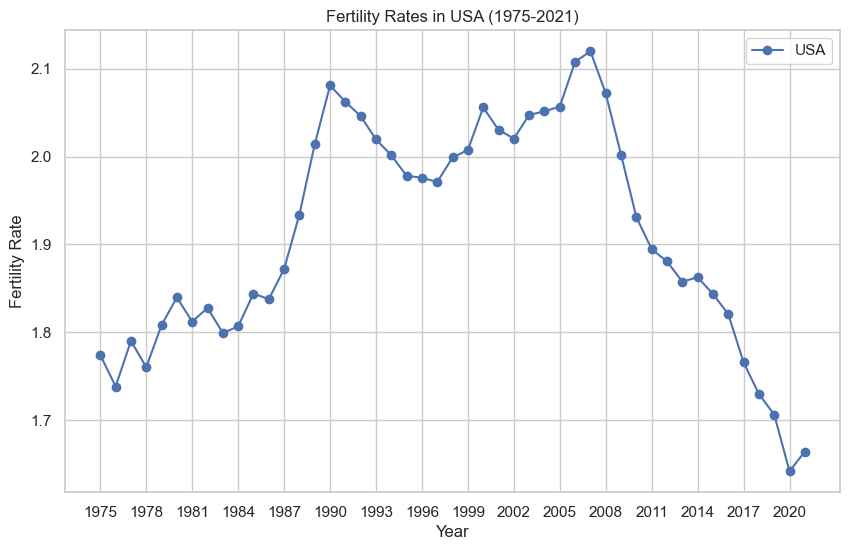

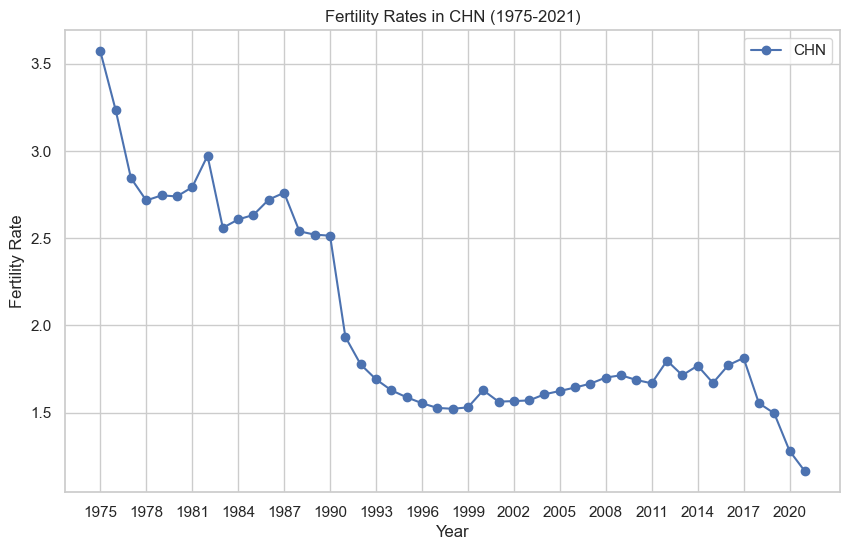

In [741]:
usa_fr = functions.ext_sel_da(fr_data, 'USA', 1975, 2021)
chn_fr = functions.ext_sel_da(fr_data, 'CHN', 1975, 2021)
functions.plot_fertility_rates(usa_fr, 'USA', 1975, 2021, 3)
functions.plot_fertility_rates(chn_fr, 'CHN', 1975, 2021, 3)

China

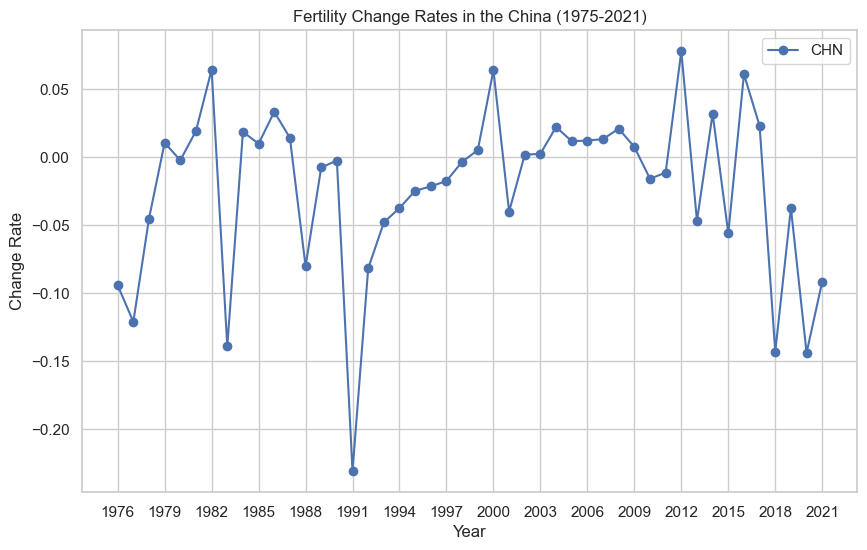

In [742]:
chn_fr_change_rates = functions.calculate_change_rate(chn_fr)
chn_cr_years = list(map(int, chn_fr_change_rates.keys()))
chn_change_rates = list(chn_fr_change_rates.values())
plt.figure(figsize=(10, 6))
plt.plot(chn_cr_years, chn_change_rates, label = 'CHN', marker='o')
plt.xticks(range(min(chn_cr_years), max(chn_cr_years) + 1, 3))
plt.title("Fertility Change Rates in the China (1975-2021)")
plt.xlabel("Year")
plt.ylabel("Change Rate")
plt.grid(True)
plt.legend()
plt.show()

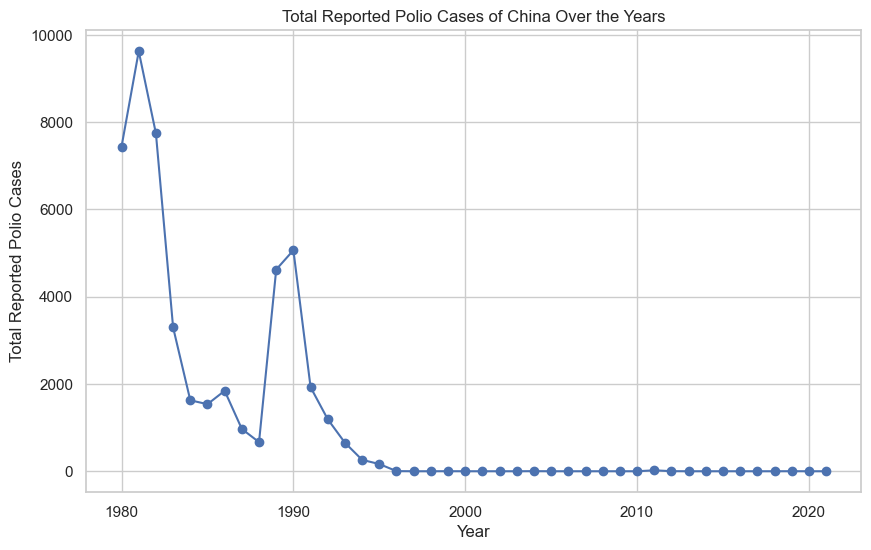

In [743]:
chn_polio = functions.ext_sel_polio(polio_data, 'CHN')
plt.figure(figsize=(10, 6))
plt.plot(chn_polio['Year'].values, chn_polio['Total (reported) polio cases'].values, marker='o')
plt.title('Total Reported Polio Cases of China Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Reported Polio Cases')
plt.grid(True)
plt.show()

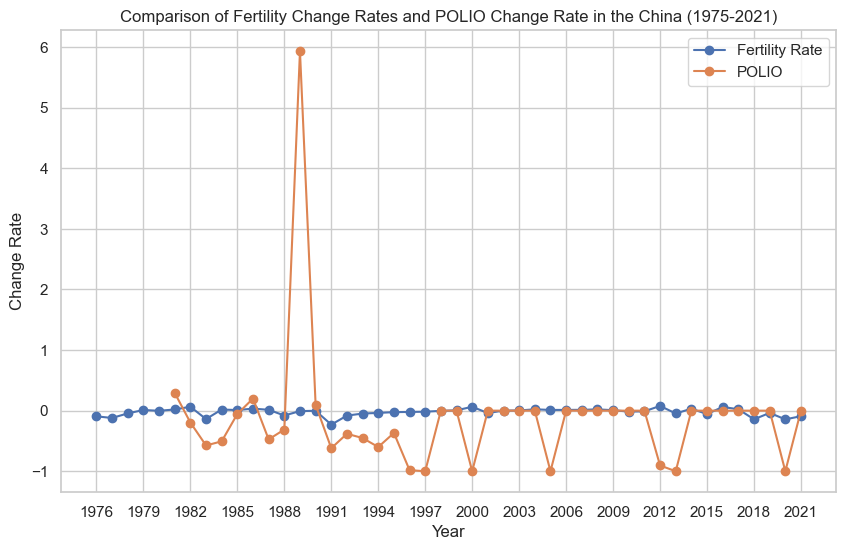

In [744]:
chn_polio_dict = chn_polio.set_index('Year')['Total (reported) polio cases'].to_dict()
chn_polio_change_rates = functions.calculate_change_rate(chn_polio_dict)
chn_polio_years = list(map(int, chn_polio_change_rates.keys()))
chn_polio_rates = list(chn_polio_change_rates.values())

plt.figure(figsize=(10, 6))
plt.plot(chn_cr_years, chn_change_rates, label = 'Fertility Rate', marker='o')
plt.plot(chn_polio_years, chn_polio_rates, label = 'POLIO', marker='o')
plt.xticks(range(min(chn_cr_years), max(chn_cr_years) + 1, 3))
plt.title("Comparison of Fertility Change Rates and POLIO Change Rate in the China (1975-2021)")
plt.xlabel("Year")
plt.ylabel("Change Rate")
plt.grid(True)
plt.legend()
plt.show()

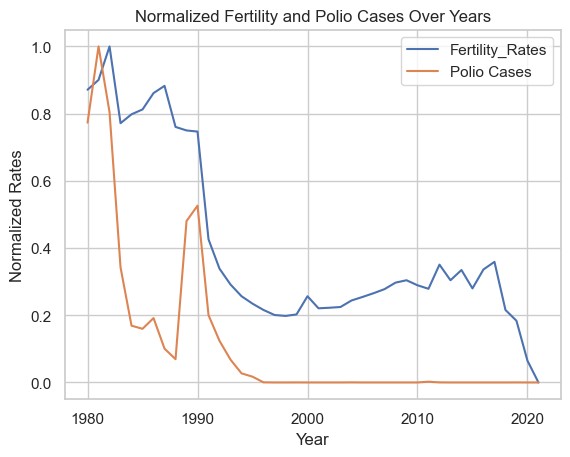

In [745]:
chn_fr_po = functions.ext_sel_da(fr_data, 'CHN', 1980, 2021)
chn_fr_po = {int(year): rate for year, rate in chn_fr_po.items()}
df = pd.DataFrame({'Fertility_Rates': chn_fr_po, 'Polio Cases': chn_polio_dict})
df_normalized = (df - df.min()) / (df.max() - df.min())
df_normalized.plot()
plt.title('Normalized Fertility and Polio Cases Over Years')
plt.xlabel('Year')
plt.ylabel('Normalized Rates')
plt.show()

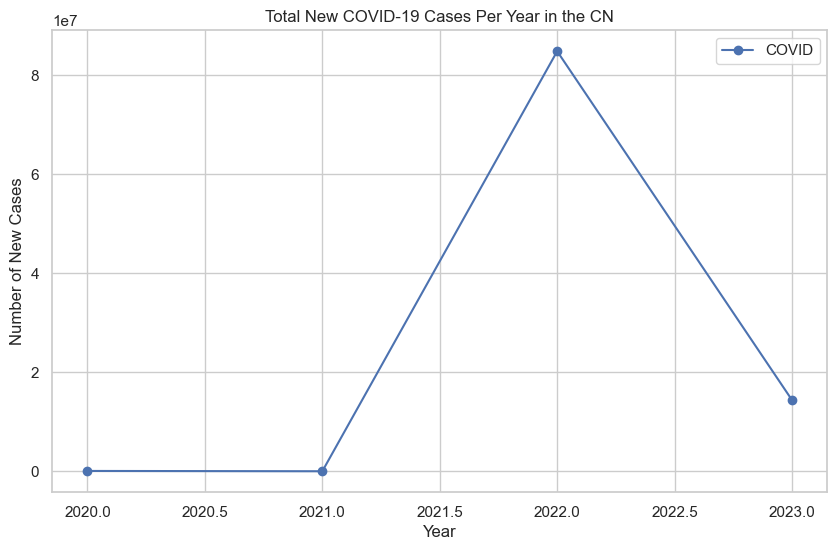

In [746]:
cn_covid = functions.ext_sel_covid(covid_data, 'CN')
plt.figure(figsize=(10, 6))
plt.plot(cn_covid, label = 'COVID', marker='o')
plt.title('Total New COVID-19 Cases Per Year in the CN')
plt.xlabel('Year')
plt.ylabel('Number of New Cases')
plt.grid(True)
plt.legend()
plt.show()

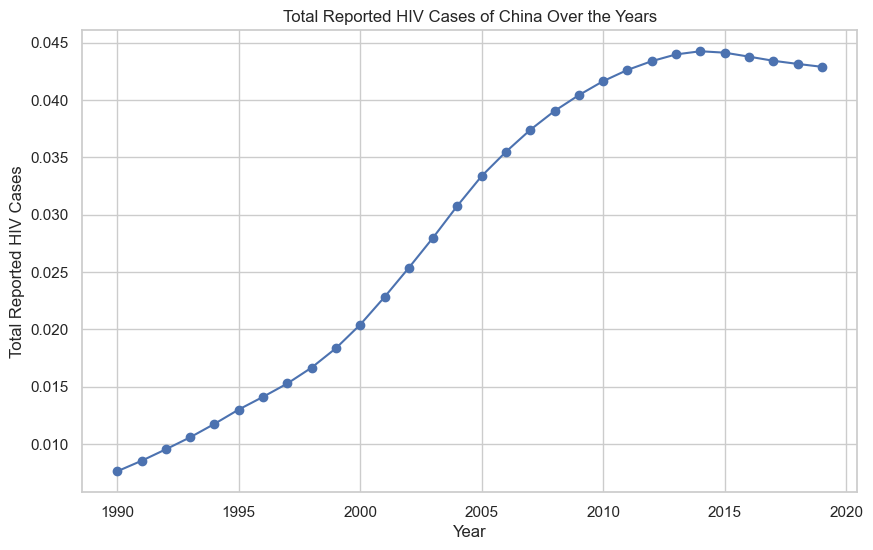

In [747]:
chn_hiv = functions.ext_sel_hiv(hiv_data, 'CHN')
plt.figure(figsize=(10, 6))
plt.plot(chn_hiv['Year'].values, chn_hiv['Current number of cases of hiv/aids per 100 people, in both sexes aged 15-49 years'].values, marker='o')
plt.title('Total Reported HIV Cases of China Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Reported HIV Cases')
plt.grid(True)
plt.show()

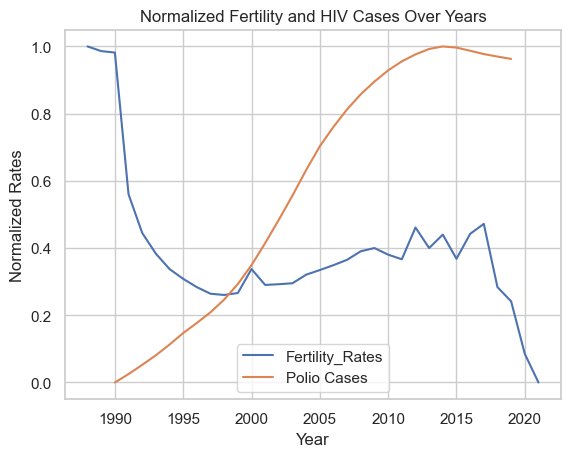

In [748]:
chn_hiv_dict = chn_hiv.set_index('Year')['Current number of cases of hiv/aids per 100 people, in both sexes aged 15-49 years'].to_dict()
chn_fr_hiv = functions.ext_sel_da(fr_data, 'CHN', 1988, 2021)
chn_fr_hiv = {int(year): rate for year, rate in chn_fr_hiv.items()}
df = pd.DataFrame({'Fertility_Rates': chn_fr_hiv, 'Polio Cases': chn_hiv_dict})
df_normalized = (df - df.min()) / (df.max() - df.min())
df_normalized.plot()
plt.title('Normalized Fertility and HIV Cases Over Years')
plt.xlabel('Year')
plt.ylabel('Normalized Rates')
plt.show()

USA

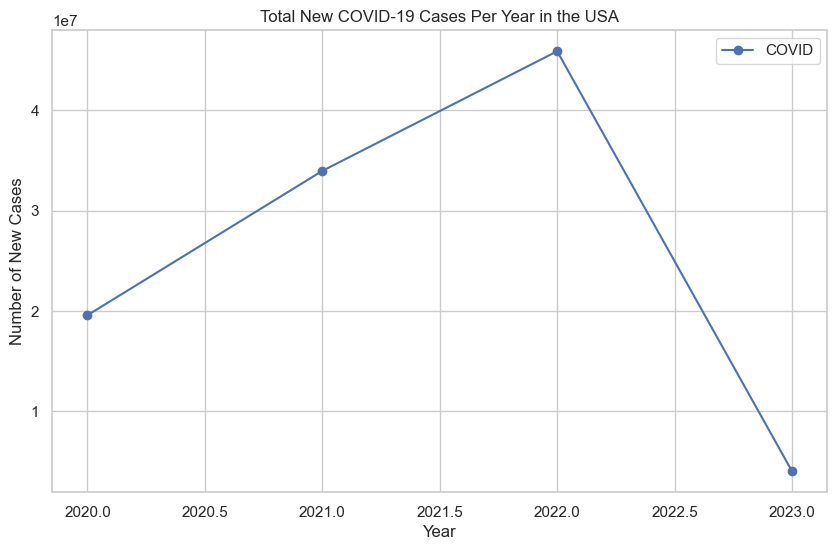

In [749]:
usa_covid = functions.ext_sel_covid(covid_data, 'US')
plt.figure(figsize=(10, 6))
plt.plot(usa_covid, label = 'COVID', marker='o')
plt.title('Total New COVID-19 Cases Per Year in the USA')
plt.xlabel('Year')
plt.ylabel('Number of New Cases')
plt.grid(True)
plt.legend()
plt.show()

In [750]:
fr_2019_to_2021 = fr_data[['Country Name', '2019', '2020', '2021']].dropna()
fr_2019_to_2021.head()

,Country Name,2019,2020,2021
0,Aruba,1.486000,1.325000,1.180000
1,Africa Eastern and Southern,4.482898,4.416900,4.354709
2,Afghanistan,4.870000,4.750000,4.643000
3,Africa Western and Central,5.118932,5.049329,4.978662
4,Angola,5.442000,5.371000,5.304000


In [751]:
covid_data['Date_reported'] = pd.to_datetime(covid_data['Date_reported'])
covid_data_filtered = covid_data[(covid_data['Date_reported'].dt.year == 2020) | (covid_data['Date_reported'].dt.year == 2021)]
grouped_data = covid_data_filtered.groupby('Country')['Cumulative_cases'].max()
top_20_countries = grouped_data.sort_values(ascending=False).head(20)
top_20_countries

Country
United States of America      53534286
India                         34838804
Brazil                        22263834
The United Kingdom            13441707
Russian Federation            10499982
Türkiye                        9441764
France                         8709926
Germany                        7014043
Iran (Islamic Republic of)     6192698
Spain                          6100138
Italy                          5981428
Argentina                      5780522
Colombia                       5138603
Indonesia                      4262720
Poland                         4109201
Mexico                         4034822
Ukraine                        3606084
South Africa                   3446532
Netherlands                    3085502
Philippines                    2843869
Name: Cumulative_cases, dtype: int64

In [752]:
top_20_country_names = top_20_countries.index.tolist()
countries_in_data = fr_2019_to_2021['Country Name'].tolist()
countries_not_in_data = []
for country in top_20_country_names:
    if country not in countries_in_data:
        countries_not_in_data.append(country)
countries_not_in_data

['United States of America',
 'The United Kingdom',
 'Türkiye',
 'Iran (Islamic Republic of)']

In [753]:
replacement_dict = {
    'United States of America': 'United States',
    'The United Kingdom': 'United Kingdom',
    'Türkiye': 'Turkiye',
    'Iran (Islamic Republic of)': 'Iran, Islamic Rep.'
}
top_20_country_names_replaced = [replacement_dict.get(country, country) for country in top_20_country_names]
top_20_country_names_replaced

['United States',
 'India',
 'Brazil',
 'United Kingdom',
 'Russian Federation',
 'Turkiye',
 'France',
 'Germany',
 'Iran, Islamic Rep.',
 'Spain',
 'Italy',
 'Argentina',
 'Colombia',
 'Indonesia',
 'Poland',
 'Mexico',
 'Ukraine',
 'South Africa',
 'Netherlands',
 'Philippines']

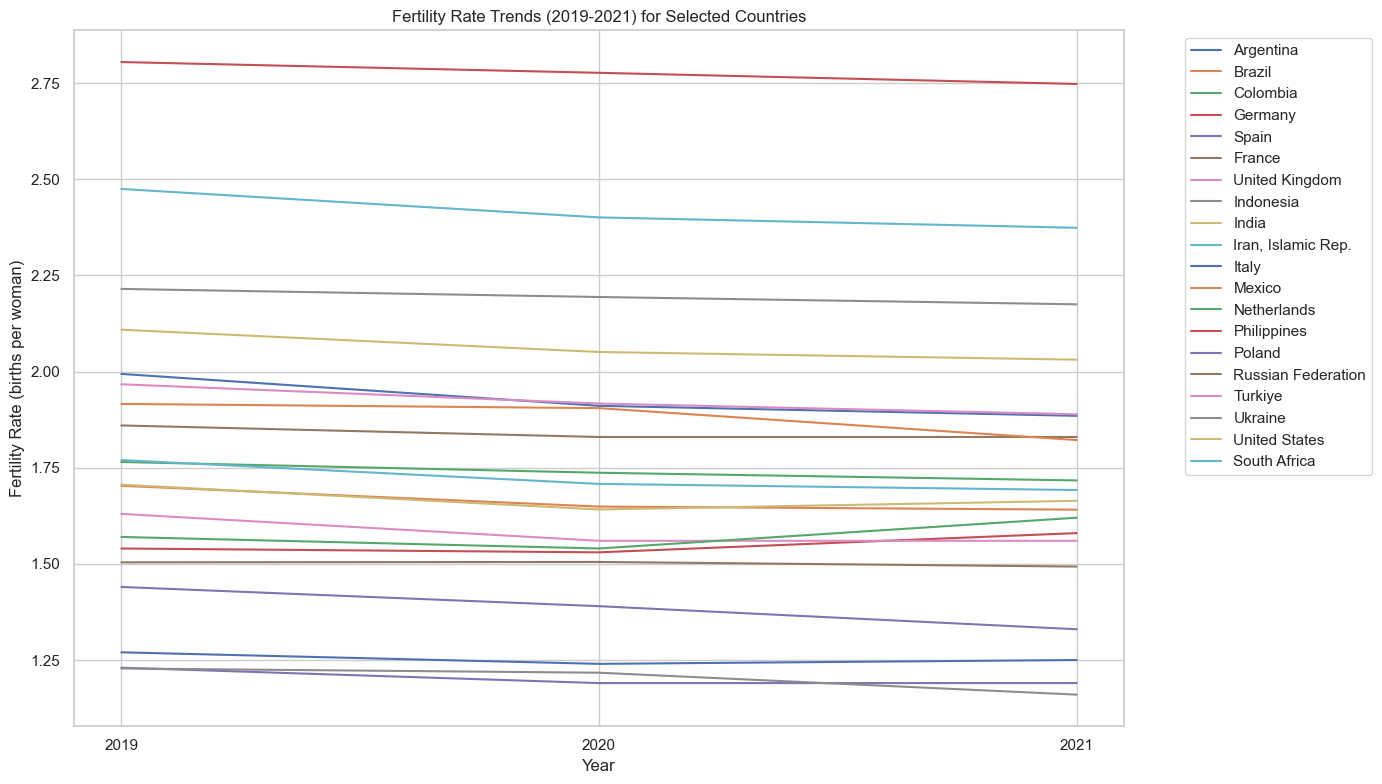

In [754]:
selected_countries_data = fr_2019_to_2021[fr_2019_to_2021['Country Name'].isin(top_20_country_names_replaced)]
plt.figure(figsize=(14, 8))
for index, row in selected_countries_data.iterrows():
    plt.plot(['2019', '2020', '2021'], row[['2019', '2020', '2021']], label=row['Country Name'])
plt.title('Fertility Rate Trends (2019-2021) for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Fertility Rate (births per woman)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [755]:
df_countries = selected_countries_data.copy()
df_countries.loc[:, 'Change Rate 2019-2020'] = (df_countries['2020'] - df_countries['2019']) / df_countries['2019']
df_countries.loc[:, 'Change Rate 2020-2021'] = (df_countries['2021'] - df_countries['2020']) / df_countries['2020']
change_rates_corrected = df_countries[['Country Name', 'Change Rate 2019-2020', 'Change Rate 2020-2021']]
change_rates_corrected.reset_index(drop=True, inplace=True)
change_rates_corrected

,Country Name,Change Rate 2019-2020,Change Rate 2020-2021
0,Argentina,-0.041625,-0.013605
1,Brazil,-0.031709,-0.004851
2,Colombia,-0.015864,-0.011514
3,Germany,-0.006494,0.032680
4,Spain,-0.032520,0.000000
5,France,-0.016129,0.000000
6,United Kingdom,-0.042945,0.000000
7,Indonesia,-0.009481,-0.008660
8,India,-0.027501,-0.009751
9,"Iran, Islamic Rep.",-0.035028,-0.009368


In [756]:
increased_fertility_countries = selected_countries_data[selected_countries_data['2021'] > selected_countries_data['2020']]
increased_fertility_countries.reset_index(drop=True, inplace=True)
increased_fertility_countries[['Country Name', '2020', '2021']]

,Country Name,2020,2021
0,Germany,1.5300,1.580
1,Italy,1.2400,1.250
2,Netherlands,1.5400,1.620
3,United States,1.6415,1.664


In [757]:
countries_decreased_faster = df_countries[
    (df_countries['Change Rate 2019-2020'] > df_countries['Change Rate 2020-2021'])
]
countries_decreased_faster[['Country Name', 'Change Rate 2019-2020', 'Change Rate 2020-2021']]

,Country Name,Change Rate 2019-2020,Change Rate 2020-2021
154,Mexico,-0.005741,-0.043570
187,Philippines,-0.009982,-0.010443
190,Poland,-0.034722,-0.043165
202,Russian Federation,0.000665,-0.007973
248,Ukraine,-0.008958,-0.046836


In [758]:
countries_decreased_slower = df_countries[
    (df_countries['Change Rate 2019-2020'] < 0) & 
    (df_countries['Change Rate 2020-2021'] < 0) & 
    (df_countries['Change Rate 2019-2020'] < df_countries['Change Rate 2020-2021'])
]
countries_decreased_slower[['Country Name', 'Change Rate 2019-2020', 'Change Rate 2020-2021']]

,Country Name,Change Rate 2019-2020,Change Rate 2020-2021
9,Argentina,-0.041625,-0.013605
29,Brazil,-0.031709,-0.004851
45,Colombia,-0.015864,-0.011514
106,Indonesia,-0.009481,-0.008660
109,India,-0.027501,-0.009751
112,"Iran, Islamic Rep.",-0.035028,-0.009368
244,Turkiye,-0.025419,-0.014606
263,South Africa,-0.029899,-0.011245


Hypothesis two

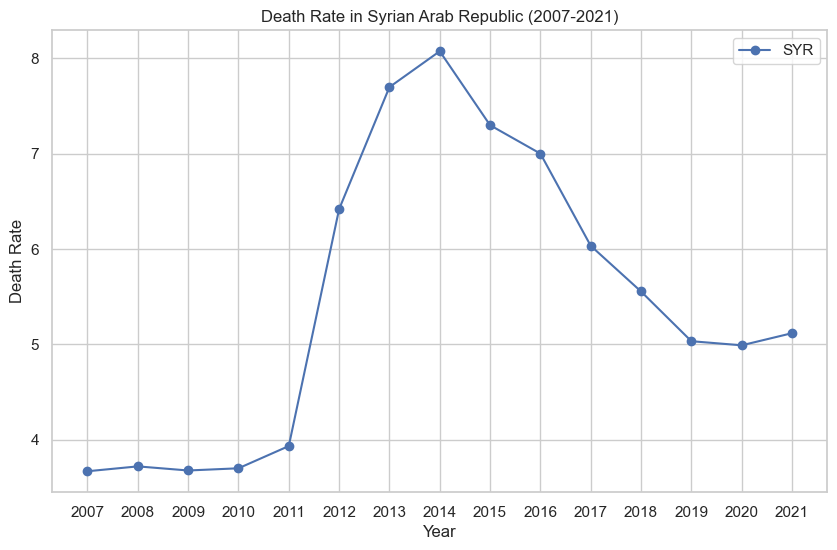

In [759]:
syrian_dt = functions.ext_sel_da(dr_data, 'SYR', 2007, 2021)
functions.plot_dt_draw(syrian_dt, 'SYR', 'Syrian Arab Republic', 1)

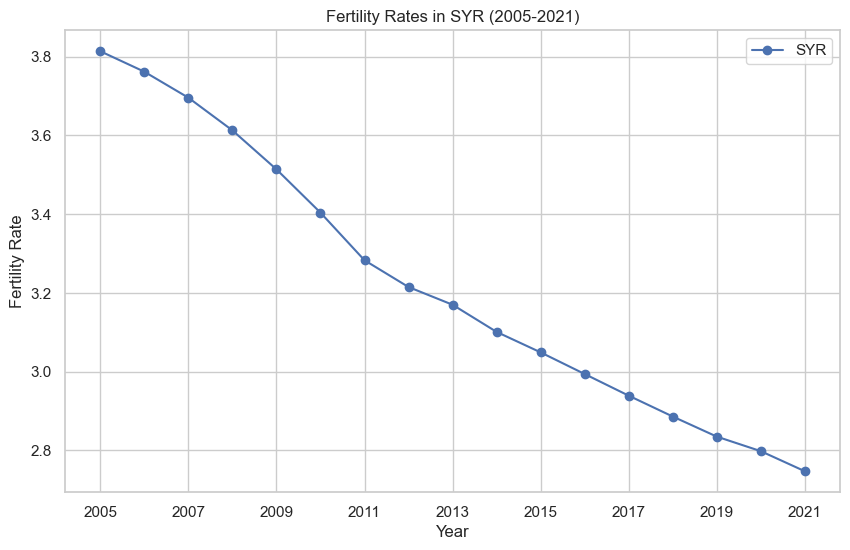

In [760]:
syr_fr = functions.ext_sel_da(fr_data, 'SYR', 2005, 2021)
functions.plot_fertility_rates(syr_fr, 'SYR', 2005, 2021, 2)

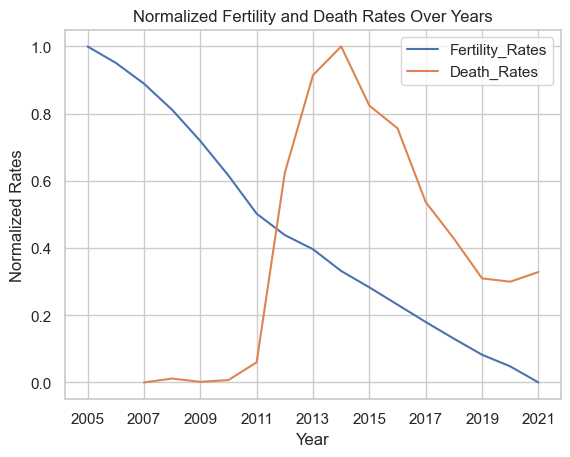

In [761]:
functions.plot_normalized_rates(syr_fr, syrian_dt)

{'2010': -0.031303357996585054, '2011': -0.03554641598119859, '2012': -0.020712762717027128, '2013': -0.013996889580093291, '2014': -0.02176656151419557, '2015': -0.016768784263140938, '2016': -0.018038701213512535}


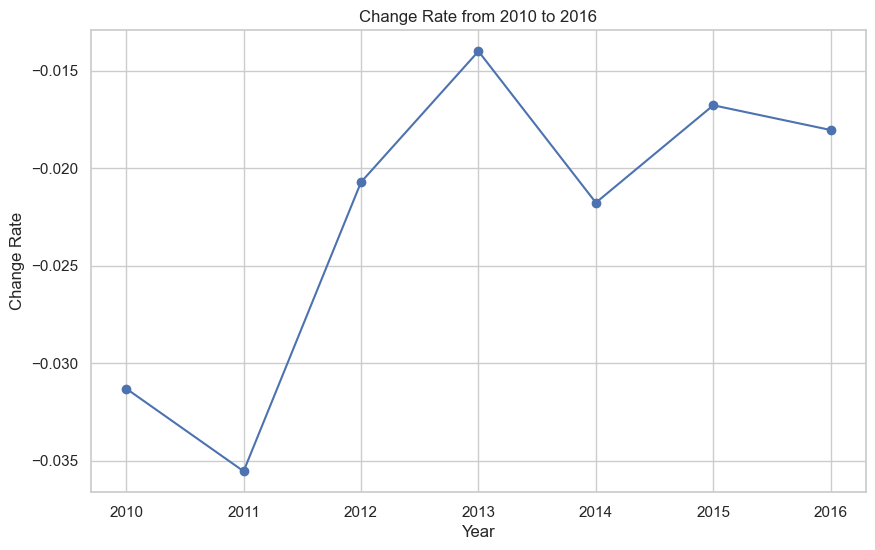

In [762]:
syr_fr_cr = functions.calculate_change_rate(syr_fr)
start_year = 2010
end_year = 2016
filtered_sy_dt_cr = {year: rate for year, rate in syr_fr_cr.items() if start_year <= int(year) <= end_year}
print(filtered_sy_dt_cr)
plt.figure(figsize=(10, 6))
plt.plot(filtered_sy_dt_cr.keys(), filtered_sy_dt_cr.values(), marker='o')
plt.title('Change Rate from {} to {}'.format(start_year, end_year))
plt.xlabel('Year')
plt.ylabel('Change Rate')
plt.grid(True)
plt.show()

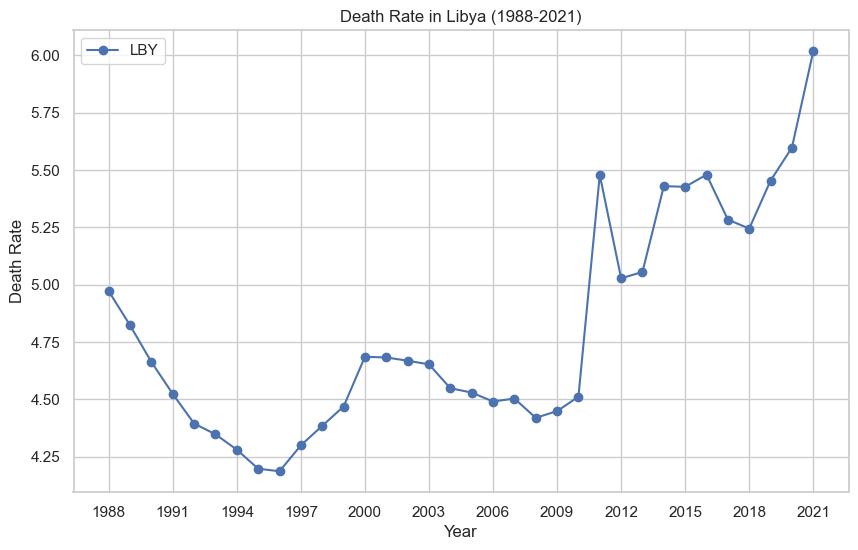

In [763]:
libya_dt = functions.ext_sel_da(dr_data, 'LBY', 1988, 2021)
functions.plot_dt_draw(libya_dt, 'LBY', 'Libya', 3)

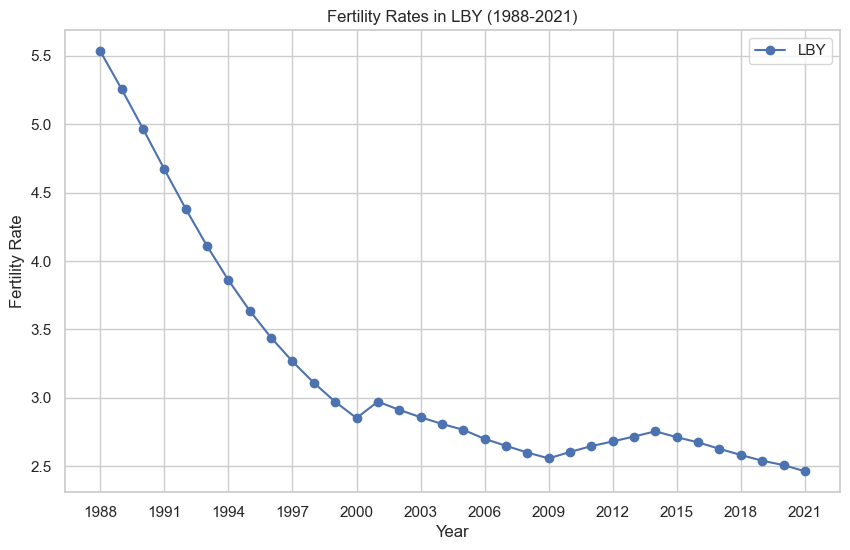

In [764]:
lby_fr = functions.ext_sel_da(fr_data, 'LBY', 1988, 2021)
functions.plot_fertility_rates(lby_fr, 'LBY', 1988, 2021, 3)

Normalized

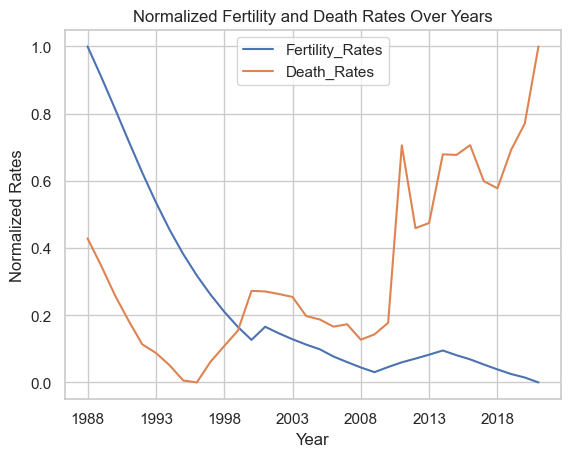

In [765]:
functions.plot_normalized_rates(lby_fr, libya_dt)

Number of documented civilian deaths in the Iraq war from 2003 to October 2023

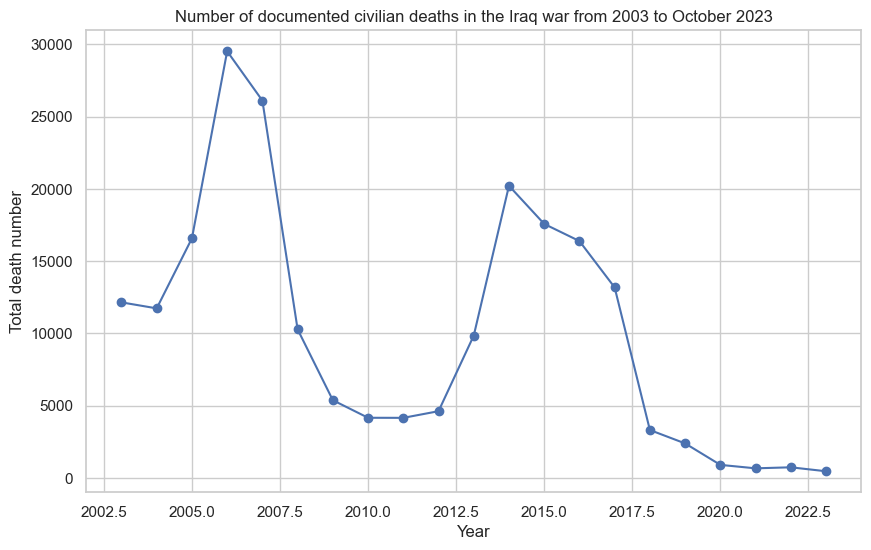

In [766]:
iraq_death_ct = iraq_death[['Year', 'Death number']]
#print(iraq_death_ct)
plt.figure(figsize=(10, 6))
plt.plot(iraq_death_ct['Year'].values, iraq_death_ct['Death number'].values, marker='o')
plt.title('Number of documented civilian deaths in the Iraq war from 2003 to October 2023')
plt.xlabel('Year')
plt.ylabel('Total death number')
plt.grid(True)
plt.show()

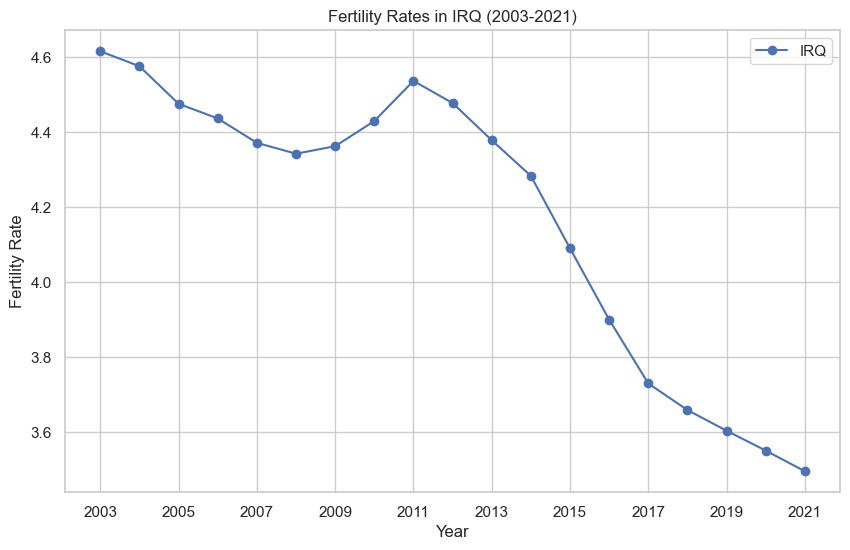

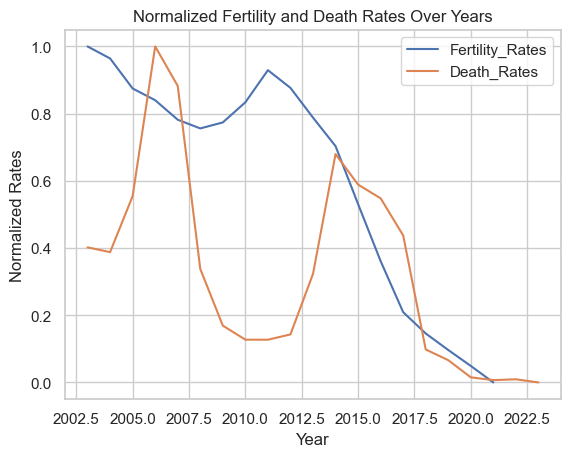

In [767]:
iraq_dt_dict = iraq_death_ct.set_index('Year')['Death number'].to_dict()
iraq_fr = functions.ext_sel_da(fr_data, 'IRQ', 2003, 2021)
functions.plot_fertility_rates(iraq_fr, 'IRQ', 2003, 2021, 2)
iraq_fr_int_keys = {int(year): rate for year, rate in iraq_fr.items()}
functions.plot_normalized_rates(iraq_fr_int_keys, iraq_dt_dict)

Battle-related deaths (number of people) - Afghanistan

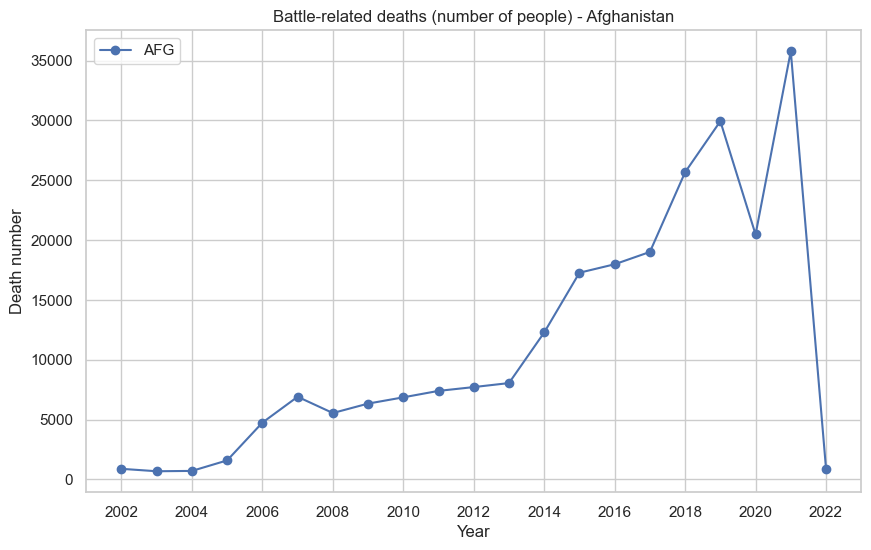

In [768]:
afg_dt = functions.ext_sel_da(bt_death, 'AFG', 2002, 2022)
afg_years = list(map(int, afg_dt.keys()))
afg_rates = list(afg_dt.values())
plt.figure(figsize=(10, 6))
plt.plot(afg_years, afg_rates, label='AFG', marker='o')
plt.xticks(range(min(afg_years), max(afg_years) + 1, 2))
plt.title("Battle-related deaths (number of people) - Afghanistan")
plt.xlabel("Year")
plt.ylabel("Death number")
plt.grid(True)
plt.legend()
plt.show()

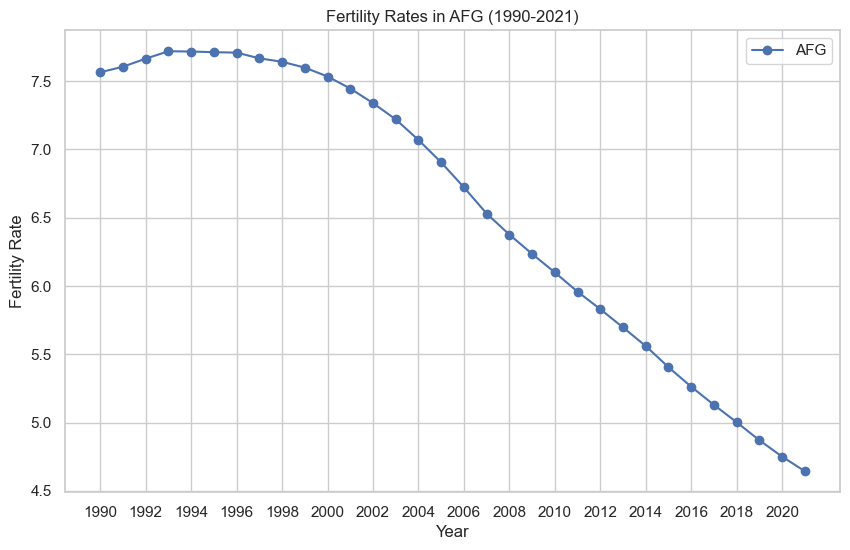

In [769]:
afg_fr = functions.ext_sel_da(fr_data, 'AFG', 1990, 2021)
functions.plot_fertility_rates(afg_fr, 'AFG', 1990, 2021, 2)

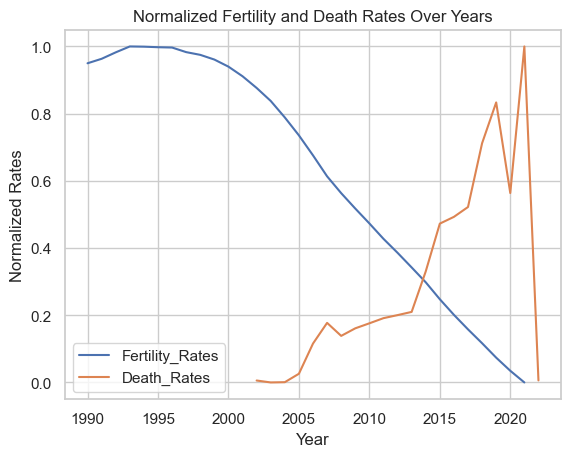

In [770]:
functions.plot_normalized_rates(afg_fr, afg_dt)

{'2002': -0.01437013161428946, '2003': -0.016214743153018213, '2004': -0.020914127423822686, '2005': -0.0231998868298203, '2006': -0.02650253439536565, '2007': -0.028562927700089284, '2008': -0.023583460949463998, '2009': -0.02211417816813049, '2010': -0.02181234963913394, '2011': -0.02311854402361043, '2012': -0.02148371936891576, '2013': -0.022984562607204176, '2014': -0.023876404494382046, '2015': -0.027877697841726504, '2016': -0.02645698427382066, '2017': -0.025275560623337138, '2018': -0.024761162019886877, '2019': -0.02638944422231101}


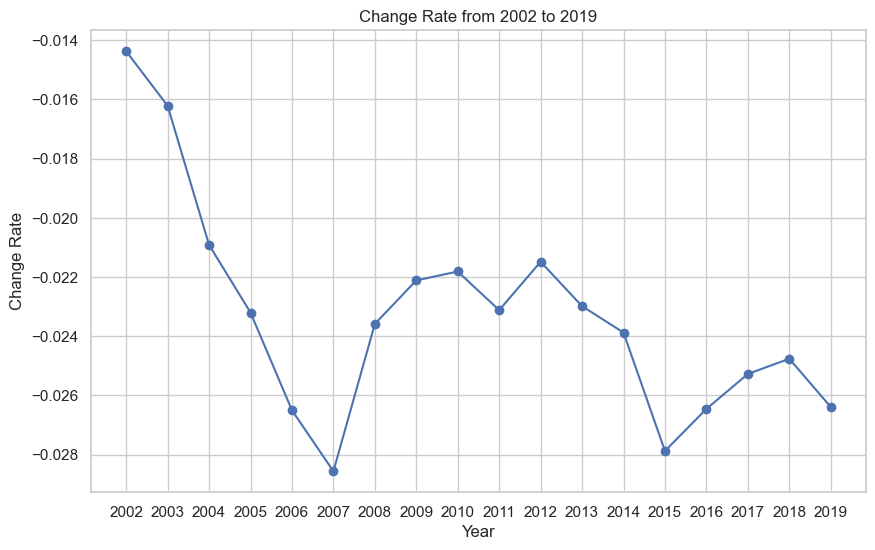

In [771]:
afg_fr_cr = functions.calculate_change_rate(afg_fr)
start_year = 2002
end_year = 2019
filtered_afg_dt_cr = {year: rate for year, rate in afg_fr_cr.items() if start_year <= int(year) <= end_year}
print(filtered_afg_dt_cr)
plt.figure(figsize=(10, 6))
plt.plot(filtered_afg_dt_cr.keys(), filtered_afg_dt_cr.values(), marker='o')
plt.title('Change Rate from {} to {}'.format(start_year, end_year))
plt.xlabel('Year')
plt.ylabel('Change Rate')
plt.grid(True)
plt.show()